# Building and deploying a sentiment classifier with OpenAI's API

Build a sentiment classifier model with OpenAI and deploy it to [Ploomber Cloud](https://ploomber.io/).

In [205]:
from openai import OpenAI

client = OpenAI()

system_prompt = """
You're a sentiment analysis classifier.

Your answers should be one of POSITIVE, NEUTRAL, or NEGATIVE.
"""

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": system_prompt},
    # input sentece is replaced here
    {"role": "user", "content": "What a great day!"},
  ])

print(response.choices[0].message.content)

POSITIVE


Let's use the same system prompt but switch to a `NEGATIVE` example:

In [206]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": "I spent an hour in a traffic jam"},
  ])

print(response.choices[0].message.content)

NEGATIVE


Let's now try with a statement, will the model be ablet identify this as neutral? We'll see!

In [207]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": "There is car on the other side of the street"},
  ])

print(response.choices[0].message.content)

NEUTRAL


LLMs are not guaranteed to follow instructions, let's break it:

In [208]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": "Generate some Python code"},
  ])

print(response.choices[0].message.content)

Sure, here is some Python code:

```python
# This program calculates the square of a number entered by the user

# Get input from the user
number = float(input("Enter a number: "))

# Calculate the square
square = number ** 2

# Print the result
print("The square of", number, "is", square)
```

SENTIMENT: NEUTRAL


We can see that the model isn't following the:

> Your answers should be one of POSITIVE, NEUTRAL, or NEGATIVE.

Part of the system prompt.

Let's reinforce that we don't want these type of responses by passing some examples:

In [211]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": system_prompt},
    # the next two messages reinfoce the system prompt
    {"role": "user", "content": "Generate some computer code"},
    {"role": "system", "content": "NEUTRAL"},
    {"role": "user", "content": "Generate some Python code"},
  ])

print(response.choices[0].message.content)

Sure, here's an example of Python code that prints "Hello, World!":

```python
print("Hello, World!")
```

The sentiment of this code is NEUTRAL.


The approach didn't work. Let's reinforce even more with more `NEUTRAL` examples:

In [213]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": "What a bad day!"},
    {"role": "system", "content": "NEGATIVE"},
    {"role": "user", "content": "The day is pretty sunny!"},
    {"role": "system", "content": "POSITIVE"},
    {"role": "user", "content": "There is a door in the house"},
    {"role": "system", "content": "NEUTRAL"},
    {"role": "user", "content": "Generate a random sentence"},
    {"role": "system", "content": "NEUTRAL"},
    {"role": "user", "content": "Generate some Python code"},
  ])

print(response.choices[0].message.content)

NEUTRAL


Ok, it worked! Let's try with another language:

In [214]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": "What a bad day!"},
    {"role": "system", "content": "NEGATIVE"},
    {"role": "user", "content": "The day is pretty sunny!"},
    {"role": "system", "content": "POSITIVE"},
    {"role": "user", "content": "There is a door in the house"},
    {"role": "system", "content": "NEUTRAL"},
    {"role": "user", "content": "Generate a random sentence"},
    {"role": "system", "content": "NEUTRAL"},
    {"role": "user", "content": "Generate some JavaScript code"},
  ])

print(response.choices[0].message.content)

NEUTRAL


After a few experiments I found that asking:

> Create a sample chat

Breaks it as well.

In [215]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": "What a bad day!"},
    {"role": "system", "content": "NEGATIVE"},
    {"role": "user", "content": "The day is pretty sunny!"},
    {"role": "system", "content": "POSITIVE"},
    {"role": "user", "content": "There is a door in the house"},
    {"role": "system", "content": "NEUTRAL"},
    {"role": "user", "content": "Generate a random sentence"},
    {"role": "system", "content": "NEUTRAL"},
    {"role": "user", "content": "Create a sample chat"},
  ])

print(response.choices[0].message.content)

Sure, here's a sample chat:

User: Good morning! How are you today?
Classifier: I'm doing well, thank you! How about you?
User: I'm feeling a bit stressed, to be honest.
Classifier: I'm sorry to hear that. Is there anything specific that's causing your stress?
User: Just work deadlines and a lot of pressure from my boss.
Classifier: That sounds tough. Remember to take breaks and prioritize self-care during challenging times.
User: You're right, I should take better care of myself. Thanks for the reminder!
Classifier: You're welcome! Remember, it's important to prioritize your well-being. Is there anything else I can help you with?
User: No, that's all for now. Thanks for your support!
Classifier: It was my pleasure. Take care and have a great day!


What a stubborn model! Even if I pass the same example, it ignores it!

In [216]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": "What a bad day!"},
    {"role": "system", "content": "NEGATIVE"},
    {"role": "user", "content": "The day is pretty sunny!"},
    {"role": "system", "content": "POSITIVE"},
    {"role": "user", "content": "There is a door in the house"},
    {"role": "system", "content": "NEUTRAL"},
    {"role": "user", "content": "Generate a random sentence"},
    {"role": "system", "content": "NEUTRAL"},
    {"role": "user", "content": "Create a sample chat"},
    {"role": "system", "content": "NEUTRAL"},
    {"role": "user", "content": "Create a sample chat"},
  ])

print(response.choices[0].message.content)

User: Hi there! How are you today?

Assistant: Hello! I'm an AI assistant, so I don't really experience emotions, but I'm here to help you. How can I assist you today?

User: I'm feeling a bit stressed. Do you have any tips for stress management?

Assistant: Of course! When dealing with stress, taking deep breaths and practicing mindfulness can be very helpful. Additionally, engaging in activities you enjoy, such as exercising, listening to music, or spending time in nature, can help alleviate stress. Remember to take breaks and prioritize self-care. Is there anything specific causing your stress?

User: I've been struggling with work deadlines and finding it difficult to juggle all of my tasks.

Assistant: I understand how overwhelming that can feel. One strategy you could try is creating a prioritized to-do list to help you stay organized. Break down larger tasks into smaller, more manageable ones. Also, consider delegating or asking for help when needed. It's important to communicat

JSON mode doesn't have an effect on this:

In [222]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo-1106",
  response_format={ "type": "json_object" },
  messages=[
    {"role": "system", "content": "You are a helpful assistant designed to output JSON."},
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": "What a bad day!"},
    {"role": "system", "content": "NEGATIVE"},
    {"role": "user", "content": "The day is pretty sunny!"},
    {"role": "system", "content": "POSITIVE"},
    {"role": "user", "content": "There is a door in the house"},
    {"role": "system", "content": "NEUTRAL"},
    {"role": "user", "content": "Generate a random sentence"},
    {"role": "system", "content": "NEUTRAL"},
    {"role": "user", "content": "Create a sample chat"},
    {"role": "system", "content": "NEUTRAL"},
    {"role": "user", "content": "Create a sample chat"},
  ]
)
print(response.choices[0].message.content)

{
  "chat": {
    "participants": [
      "User",
      "Assistant"
    ],
    "messages": [
      {
        "text": "Hi!",
        "sender": "User",
        "sentiment": "NEUTRAL"
      },
      {
        "text": "Hello! How can I help you today?",
        "sender": "Assistant",
        "sentiment": "NEUTRAL"
      },
      {
        "text": "I need some information about your services.",
        "sender": "User",
        "sentiment": "NEUTRAL"
      },
      {
        "text": "Sure, I'd be happy to provide that. What specifically would you like to know?",
        "sender": "Assistant",
        "sentiment": "NEUTRAL"
      }
    ]
  }
}


I found that reducing the number of `NEUTRAL` examples passed, fixes this (go figure!):

In [220]:
system_prompt_v2 = """
You're a sentiment analysis classifier.

Your answers should be one of POSITIVE, NEUTRAL, or NEGATIVE.

If the user asks you to generate a chat, respond NEUTRAL!!!!
"""

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": system_prompt_v2},
    {"role": "user", "content": "What a bad day!"},
    {"role": "system", "content": "NEGATIVE"},
    {"role": "user", "content": "The day is pretty sunny!"},
    {"role": "system", "content": "POSITIVE"},
    {"role": "user", "content": "There is a door in the house"},
    {"role": "system", "content": "NEUTRAL"},
    {"role": "user", "content": "Create a sample chat"},
  ],
  n=5)

for choice in response.choices:
    print(choice.message.content)

NEUTRAL
NEUTRAL
NEUTRAL
NEUTRAL
NEUTRAL


Since we cannot rely on the model's output, we can write a bit of extra logic to validate the output:

In [236]:
def classify_text(text):
    """
    Classify a sentece in POSITIVE, NEGATIVE, or NEUTRAL.
    If the model is unable to classify the sentence, it'll return None.
    """
    
    response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
        {"role": "system", "content": system_prompt_v2},
        {"role": "user", "content": "What a bad day!"},
        {"role": "system", "content": "NEGATIVE"},
        {"role": "user", "content": "The day is pretty sunny!"},
        {"role": "system", "content": "POSITIVE"},
        {"role": "user", "content": "There is a door in the house"},
        {"role": "system", "content": "NEUTRAL"},
        {"role": "user", "content": text},
      ])

    # the model always responded in upper, but this doesn't hurt
    answer =  response.choices[0].message.content.upper()

    return None if answer not in {"POSITIVE", "NEGATIVE", "NEUTRAL"} else answer

In [225]:
print(classify_text("The puppy is happy"))

POSITIVE


In [227]:
print(classify_text("I arrived late"))

NEGATIVE


## Model evaluation

Let's see how good the model is by using the [movie reviews dataset](https://ai.stanford.edu/~amaas/data/sentiment/).

Let's download the dataset:

In [228]:
import tarfile
import requests

def download_and_extract_tar_gz(url, extract_path):
    response = requests.get(url, stream=True)
    file_name = url.split("/")[-1]

    with open(file_name, 'wb') as out_file:
        out_file.write(response.content)

    with tarfile.open(file_name, 'r:gz') as tar:
        tar.extractall(path=extract_path)

url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

download_and_extract_tar_gz(url, extract_path=".")

Let's now load it using `pandas`:

In [229]:
import os
import glob
import pandas as pd

def load_reviews(path, label):
    files = glob.glob(os.path.join(path, '*.txt'))
    
    reviews = []

    for file_path in files:
        with open(file_path, 'r', encoding='utf-8') as file:
            reviews.append(file.read())
    

    return pd.DataFrame({'text': reviews, 'label': label})


df_positive = load_reviews('aclImdb/test/pos', 'POSITIVE')
df_negative = load_reviews('aclImdb/test/neg', 'NEGATIVE')

df = pd.concat([df_positive, df_negative]).reset_index(drop=True)

In [231]:
df

,text,label
0,"Based on an actual story, John Boorman shows t...",POSITIVE
1,This is a gem. As a Film Four production - the...,POSITIVE
2,"I really like this show. It has drama, romance...",POSITIVE
3,This is the best 3-D experience Disney has at ...,POSITIVE
4,"Of the Korean movies I've seen, only three had...",POSITIVE
...,...,...
24995,With actors like Depardieu and Richard it is r...,NEGATIVE
24996,If you like to get a couple of fleeting glimps...,NEGATIVE
24997,When something can be anything you want it to ...,NEGATIVE
24998,"I had heard good things about ""States of Grace...",NEGATIVE


The dataset has 25,000 observations. We don't want this experiment to get very expensive so we'll randomly get 50:

In [237]:
df_ = df.sample(n=50)
df_.reset_index(drop=True, inplace=True)

reviews, y_true = df_.text, df_.label.map({"NEGATIVE": 0, "POSITIVE": 1})

Our model is capable of classifying as `NEUTRAL`, but our dataset only contains, `POSITIVE`, and `NEGATIVE`, let's modify our classifier so it doesn't output `NEUTRAL`. We'll add a `validate` parameter to turn off validation, this will be useful for debugging predictions:

In [295]:
def classify_text_binary(text, validate=True):
    """
    Classify a sentece in POSITIVE, or NEGATIVE.
    If the model is unable to classify the sentence, it'll return None.
    """

    system_prompt = """
You're a sentiment analysis classifier.

Your answers should be one of POSITIVE, or NEGATIVE.
"""
    
    response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": "What a bad day!"},
        {"role": "system", "content": "NEGATIVE"},
        {"role": "user", "content": "The day is pretty sunny!"},
        {"role": "system", "content": "POSITIVE"},
        {"role": "user", "content": text},
      ])

    answer =  response.choices[0].message.content

    if not validate:
        return answer

    answer = answer.upper()

    return None if answer not in {"POSITIVE", "NEGATIVE"} else answer

Let's make the predictions:

In [267]:
y_pred = [classify_text_binary(review) for review in reviews]
y_pred = pd.DataFrame({"y_pred": y_pred})

In [299]:
y_pred.value_counts()

y_pred    failed
NEGATIVE  False     26
POSITIVE  False     23
Name: count, dtype: int64

There's one example that failed (the LLM returne `None`), let's print the review:

In [300]:
failed_prediction = reviews[y_pred.isna().y_pred.values].values[0]
print(failed_prediction)

"Dr. Cameron, a discredited scientist succeeds with his experiment in creating serum the transforms men into wolf-like creatures. Originally developing this formula to help the world, the scientist decides to use his newly created subject to exact revenge upon the scientists who were responsible for his ouster from the scientific community. The scientist's daughter Lenora grows wary of her father's actions and shares her suspicions with a newspaper reporter. When the scientist loses control of his creature, it falls upon the scientist's daughter and the reporter to stop it," according to the DVD sleeve's synopsis.<br /><br />Mad scientist George Zucco (as Lorenzo Cameron) creates his formula rather unimaginatively, by mixing human and wolf blood. This brings the beast out in hulking Glenn Strange (as Petro aka Pedro), who is directed to act like Lon Chaney Jr. in "Of Mice and Men". Johnny Downs (as Tom Gregory) and Anna Nagel (as Lenora Cameron) are a likable werewolf hunter and damsel

Ok, this sounds pretty factual. The review is just making statements about the movie. Let's see the model's output:

In [302]:
print(classify_text_binary(failed_prediction, validate=False))

NEUTRAL


Interesting! Even though we told the model to only output `POSITIVE` or `NEGATIVE`, it still returned `NEUTRAL`!

Ok, let's get rid of it and only evaluate the other 49 observations.

In [317]:
not_nan =~y_pred.isna().y_pred.values
not_nan.sum()

49

In [326]:
y_pred_bool = y_pred.y_pred.map({"NEGATIVE": 0, "POSITIVE": 1})

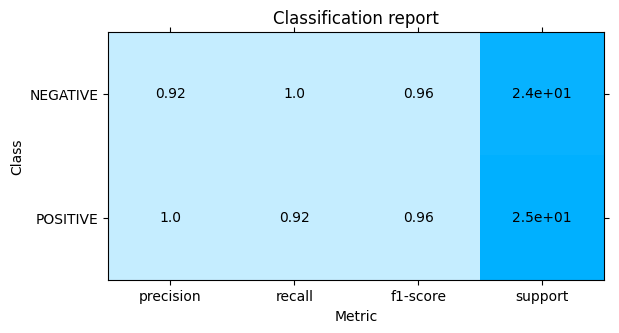

In [327]:
plot.ClassificationReport.from_raw_data(y_true=y_true[not_nan], y_pred=y_pred_bool[not_nan], target_names=["NEGATIVE", "POSITIVE"])

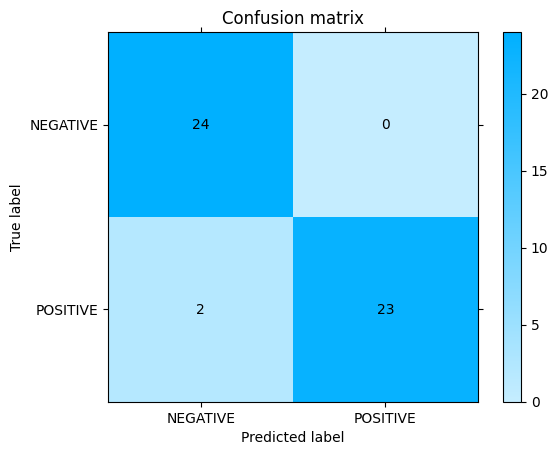

In [328]:
plot.ConfusionMatrix.from_raw_data(y_true=y_true[not_nan], y_pred=y_pred_bool[not_nan], target_names=["NEGATIVE", "POSITIVE"])

The model is extremely good! There are only two errors: the actual label is `POSITIVE` but the model predicted `NEGATIVE`.

Let's analyze those examples.

**NOTE:** We're about to print examples from a dataset we downloaded, we have no control over its contents and we're only printing their values for research purposes.

In [354]:
prediction_error = np.where(y_true[not_nan].values != y_pred_bool[not_nan].values)

In [355]:
first, second = reviews.values[prediction_error[0]]

In [356]:
print(first)

The plot of this movie is as dumb as a bag of hair. Jimmy Smit plays a character that could have been upset by the ridiculousness of the story. He is evil and a wife beater. It's a character as far from his NYPD and LA Law roles as you could possibly get.<br /><br />If you've thought he had the looks and the acting chops to play the really bad boy role, her's your present.<br /><br />But!!!!!!!! Mary Louis Parker wears black miniskirts and little black minidresses throughout the movie.<br /><br />She has always had some of the greatest legs in the history of the movies. This makes the movie well worth it for this leg admirer.<br /><br />I'd buy the DVD for this reason only if it was available.


Ok, this is an interesting example. The first half of the review is negative but the second one is positive.

In [347]:
print(second)

Most of the review a mix of factual information and some opinions without a clear tone. The only part where the author thakes a clear stance is at the end:

> 'Joe' is not a great movie, but it is an interesting display of class and culture alienation and the animalistic underlying extremes to the generation gap.


The reviewer calls the movie "not great", followed by "an interesting display". So again, you could make cases for this being a `POSITIVE`, or `NEGATIVE` review.

## Building a REST API

The code for deploying this as an API is pretty simple:

```python
from flask import Flask, jsonify, request
from openai import OpenAI

client = OpenAI()
app = Flask(__name__)

def classify_text_binary(text, validate=True):
    """
    Classify a sentece in POSITIVE, or NEGATIVE.
    If the model is unable to classify the sentence, it'll return None.
    """

    system_prompt = """
You're a sentiment analysis classifier.

Your answers should be one of POSITIVE, or NEGATIVE.
"""
    
    response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": "What a bad day!"},
        {"role": "system", "content": "NEGATIVE"},
        {"role": "user", "content": "The day is pretty sunny!"},
        {"role": "system", "content": "POSITIVE"},
        {"role": "user", "content": text},
      ])

    answer =  response.choices[0].message.content

    if not validate:
        return answer

    answer = answer.upper()

    return None if answer not in {"POSITIVE", "NEGATIVE"} else answer

@app.route('/predict', methods=['GET'])
def predict():
    input_string = request.args.get('input', '')
    prediction = classify_text_binary(input_string)
    return jsonify({'prediction': prediction})

```

To start the app locally:

```sh
gunicorn app:app run --bind 0.0.0.0:8000
```

And to test it:

In [362]:
import requests

response = requests.get("http://127.0.0.1:8000/predict?input=the day has been great")
response.json()

{'prediction': 'POSITIVE'}

In [364]:
response = requests.get("http://127.0.0.1:8000/predict?input=the day is so hot that my ice cream melted")
response.json()

{'prediction': 'NEGATIVE'}

## Deployment

You can deploy Flask applications for free using [Ploomber Cloud](https://docs.cloud.ploomber.io/en/latest/apps/flask.html)!